In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
data = pd.read_csv('Bitcoin.csv')

data = data[::-1]

data

,Date,Price,Open,High,Low,Vol.,Change %
2276,"Jan 12, 2014",939.8,"1,005.3","1,022.7",922.1,9.93K,-6.52%
2275,"Jan 13, 2014",922.9,939.8,949.2,879.9,10.13K,-1.80%
2274,"Jan 14, 2014",919.3,922.9,942.5,904.2,4.31K,-0.39%
2273,"Jan 15, 2014",941.2,919.3,973.1,915.1,6.83K,2.39%
2272,"Jan 16, 2014",913.5,941.2,955.5,910.5,5.10K,-2.95%
...,...,...,...,...,...,...,...
4,"Apr 02, 2020","6,800.5","6,638.8","7,182.7","6,567.9",1.74M,2.44%
3,"Apr 03, 2020","6,735.9","6,799.9","7,026.3","6,623.6",1.35M,-0.95%
2,"Apr 04, 2020","6,857.4","6,735.9","6,958.6","6,679.1",1.05M,1.80%
1,"Apr 05, 2020","6,772.7","6,857.5","6,889.4","6,686.0",842.33K,-1.23%


In [3]:
new_data = data['Price']

new_data

2276      939.8
2275      922.9
2274      919.3
2273      941.2
2272      913.5
         ...   
4       6,800.5
3       6,735.9
2       6,857.4
1       6,772.7
0       7,332.3
Name: Price, Length: 2277, dtype: object

In [4]:
new_data = new_data.str.replace(',', '')
new_data = (new_data).apply(lambda x: float(x))

new_data

2276     939.8
2275     922.9
2274     919.3
2273     941.2
2272     913.5
         ...  
4       6800.5
3       6735.9
2       6857.4
1       6772.7
0       7332.3
Name: Price, Length: 2277, dtype: float64

In [5]:
data['Price'] = new_data

data

,Date,Price,Open,High,Low,Vol.,Change %
2276,"Jan 12, 2014",939.8,"1,005.3","1,022.7",922.1,9.93K,-6.52%
2275,"Jan 13, 2014",922.9,939.8,949.2,879.9,10.13K,-1.80%
2274,"Jan 14, 2014",919.3,922.9,942.5,904.2,4.31K,-0.39%
2273,"Jan 15, 2014",941.2,919.3,973.1,915.1,6.83K,2.39%
2272,"Jan 16, 2014",913.5,941.2,955.5,910.5,5.10K,-2.95%
...,...,...,...,...,...,...,...
4,"Apr 02, 2020",6800.5,"6,638.8","7,182.7","6,567.9",1.74M,2.44%
3,"Apr 03, 2020",6735.9,"6,799.9","7,026.3","6,623.6",1.35M,-0.95%
2,"Apr 04, 2020",6857.4,"6,735.9","6,958.6","6,679.1",1.05M,1.80%
1,"Apr 05, 2020",6772.7,"6,857.5","6,889.4","6,686.0",842.33K,-1.23%


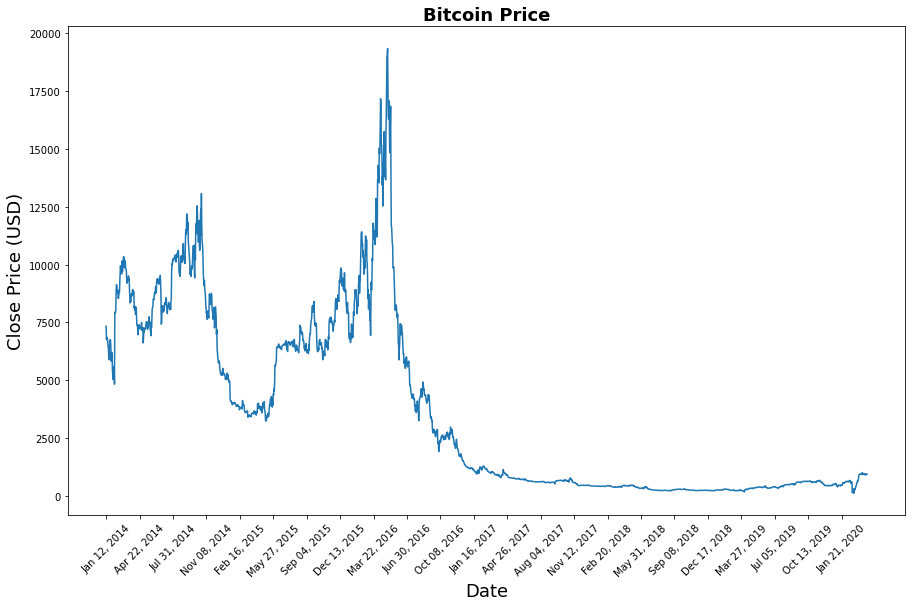

In [6]:
price = data[['Price']]

plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, data.shape[0],100), data['Date'].loc[::100],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [7]:
#price = new_data.reshape((2618  , 1))

#price

In [8]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

norm_data = min_max_scaler.fit_transform(price.values)


print(f'Real: {price.values[0]}, Normalized: {norm_data[0]}')
print(f'Real: {price.values[500]}, Normalized: {norm_data[500]}')
print(f'Real: {price.values[1200]}, Normalized: {norm_data[1200]}')

Real: [939.8], Normalized: [0.04305939]
Real: [237.3], Normalized: [0.00653534]
Real: [1286.6], Normalized: [0.06109005]


In [9]:
norm_data

array([[0.04305939],
       [0.04218073],
       [0.04199356],
       ...,
       [0.3507245 ],
       [0.34632082],
       [0.37541528]])

In [10]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

past_history = 5
future_target = 0

TRAIN_SPLIT = int(len(norm_data) * 0.8)


x_train, y_train = univariate_data(norm_data,
                                   0,
                                   TRAIN_SPLIT,
                                   past_history,
                                   future_target)

x_test, y_test = univariate_data(norm_data,
                                 TRAIN_SPLIT,
                                 None,
                                 past_history,
                                 future_target)

x_train.shape

(1816, 5, 1)

In [11]:
y_train.shape

(1816, 1)

In [12]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM, LeakyReLU, Dropout

num_units = 64
learning_rate = 0.0001
activation_function = 'sigmoid'
adam = Adam(lr=learning_rate)
loss_function = 'mse'
batch_size = 5
num_epochs = 50

# Initialize the RNN
model = Sequential()
model.add(LSTM(units = num_units, activation=activation_function, input_shape=(None, 1)))
model.add(LeakyReLU(alpha=0.5))
model.add(Dropout(0.1))
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer=adam, loss=loss_function)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.1,
    batch_size=batch_size,
    epochs=num_epochs,
    shuffle=False,
    validation_data = x_test
)

Epoch 1/50
327/327 [==============================] - 1s 3ms/step - loss: 0.0487 - val_loss: 0.0249
Epoch 2/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0438 - val_loss: 0.0277
Epoch 3/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0443 - val_loss: 0.0322
Epoch 4/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0372 - val_loss: 0.0271
Epoch 5/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0368 - val_loss: 0.0246
Epoch 6/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0350 - val_loss: 0.0264
Epoch 7/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0344 - val_loss: 0.0252
Epoch 8/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0355 - val_loss: 0.0271
Epoch 9/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0329 - val_loss: 0.0222
Epoch 10/50
327/327 [==============================] - 1s 2ms/step - loss: 0.0320 - val_loss: 0.0219

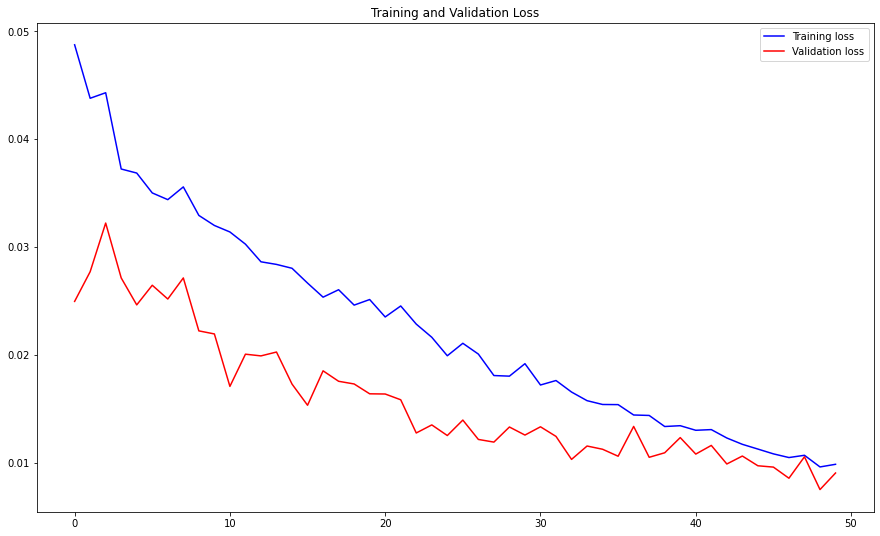

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize = (15,9))

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

[Text(-100.0, 0, ''),
 Text(0.0, 0, ''),
 Text(100.0, 0, ''),
 Text(200.0, 0, ''),
 Text(300.0, 0, ''),
 Text(400.0, 0, ''),
 Text(500.0, 0, '')]

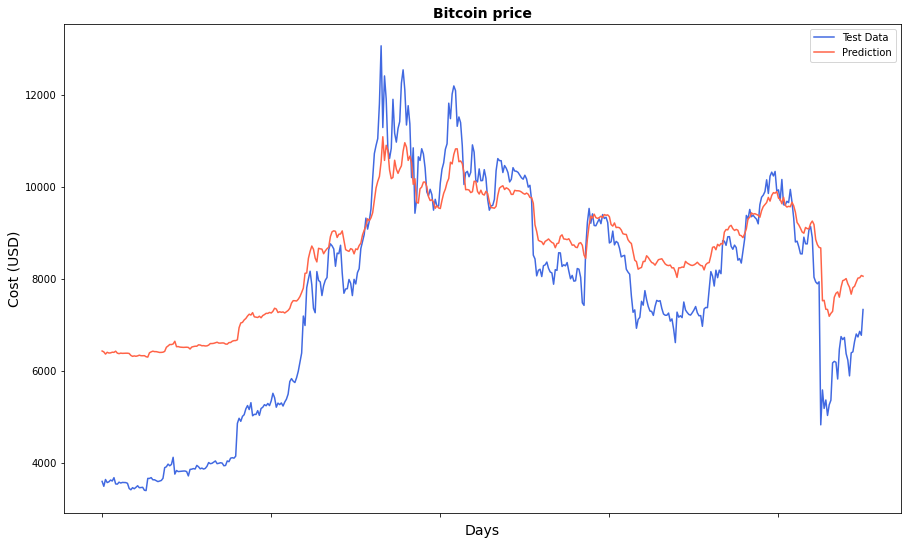

In [15]:
import seaborn as sns

original = pd.DataFrame(min_max_scaler.inverse_transform(y_test))
predictions = pd.DataFrame(min_max_scaler.inverse_transform(model.predict(x_test)))

fig, ax = plt.subplots(figsize=(15,9))
ax = sns.lineplot(x=original.index, y=original[0], label="Test Data", color='royalblue')
ax = sns.lineplot(x=predictions.index, y=predictions[0], label="Prediction", color='tomato')
ax.set_title('Bitcoin price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)